# ML Challenge - Customer Segmentation: Cluster Visualizations

This challenge will analyse a dataset of 8500 customers showing 18 features related to their credit card transactions. The goal is to find a meaningful customer segmentation to define a different strategy for each.

## Import libraries

In [108]:
import pandas as pd
import numpy as np
from itertools import combinations, permutations, product
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px

plt.rcParams["figure.figsize"] = (15,12)

## Data reading and cleaning

In [254]:
# Read data
data = pd.read_csv('../data/labelled_transactions2.csv')
data['Outlier_Tier'] = data['Outlier_CBLOF'] + data['Outlier_IF']
data.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,Outlier_CBLOF,Outlier_IF,KMeans_label,labels_hierarchical_3c,labels_hierarchical_9c,PowTrUMAT,PCA1,PCA2,PCA3,Outlier_Tier
0,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,...,0,0,2,0,1,4,-0.000631,-8.714580,6.436654,0
1,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,...,0,0,2,0,1,4,-0.000808,-6.909195,10.087004,0
2,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,...,0,0,2,0,1,4,-0.001171,4.338501,2.230524,0
3,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,...,0,0,2,0,1,1,-0.000088,-4.741164,2.741709,0
4,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,...,0,0,2,0,1,5,-0.001052,1.642197,-7.073983,0


In [38]:
my_list = ['purchase_amount', 
           'credit_limit', 
           'payments', 
           'purchase_amount', 
           'balance_account', 
           'installments', 
           'purchases_frequency', 
           'paid_advance',
           'balance_frequency_update', 
           'nr_purchases', 
           'fixed_rate_period',
           'full_payments_prc'] # 'full_purchases',
data.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc', 'Outlier_CBLOF', 'Outlier_IF', 'KMeans_label',
       'labels_hierarchical_3c', 'labels_hierarchical_9c', 'PowTrUMAT'],
      dtype='object')

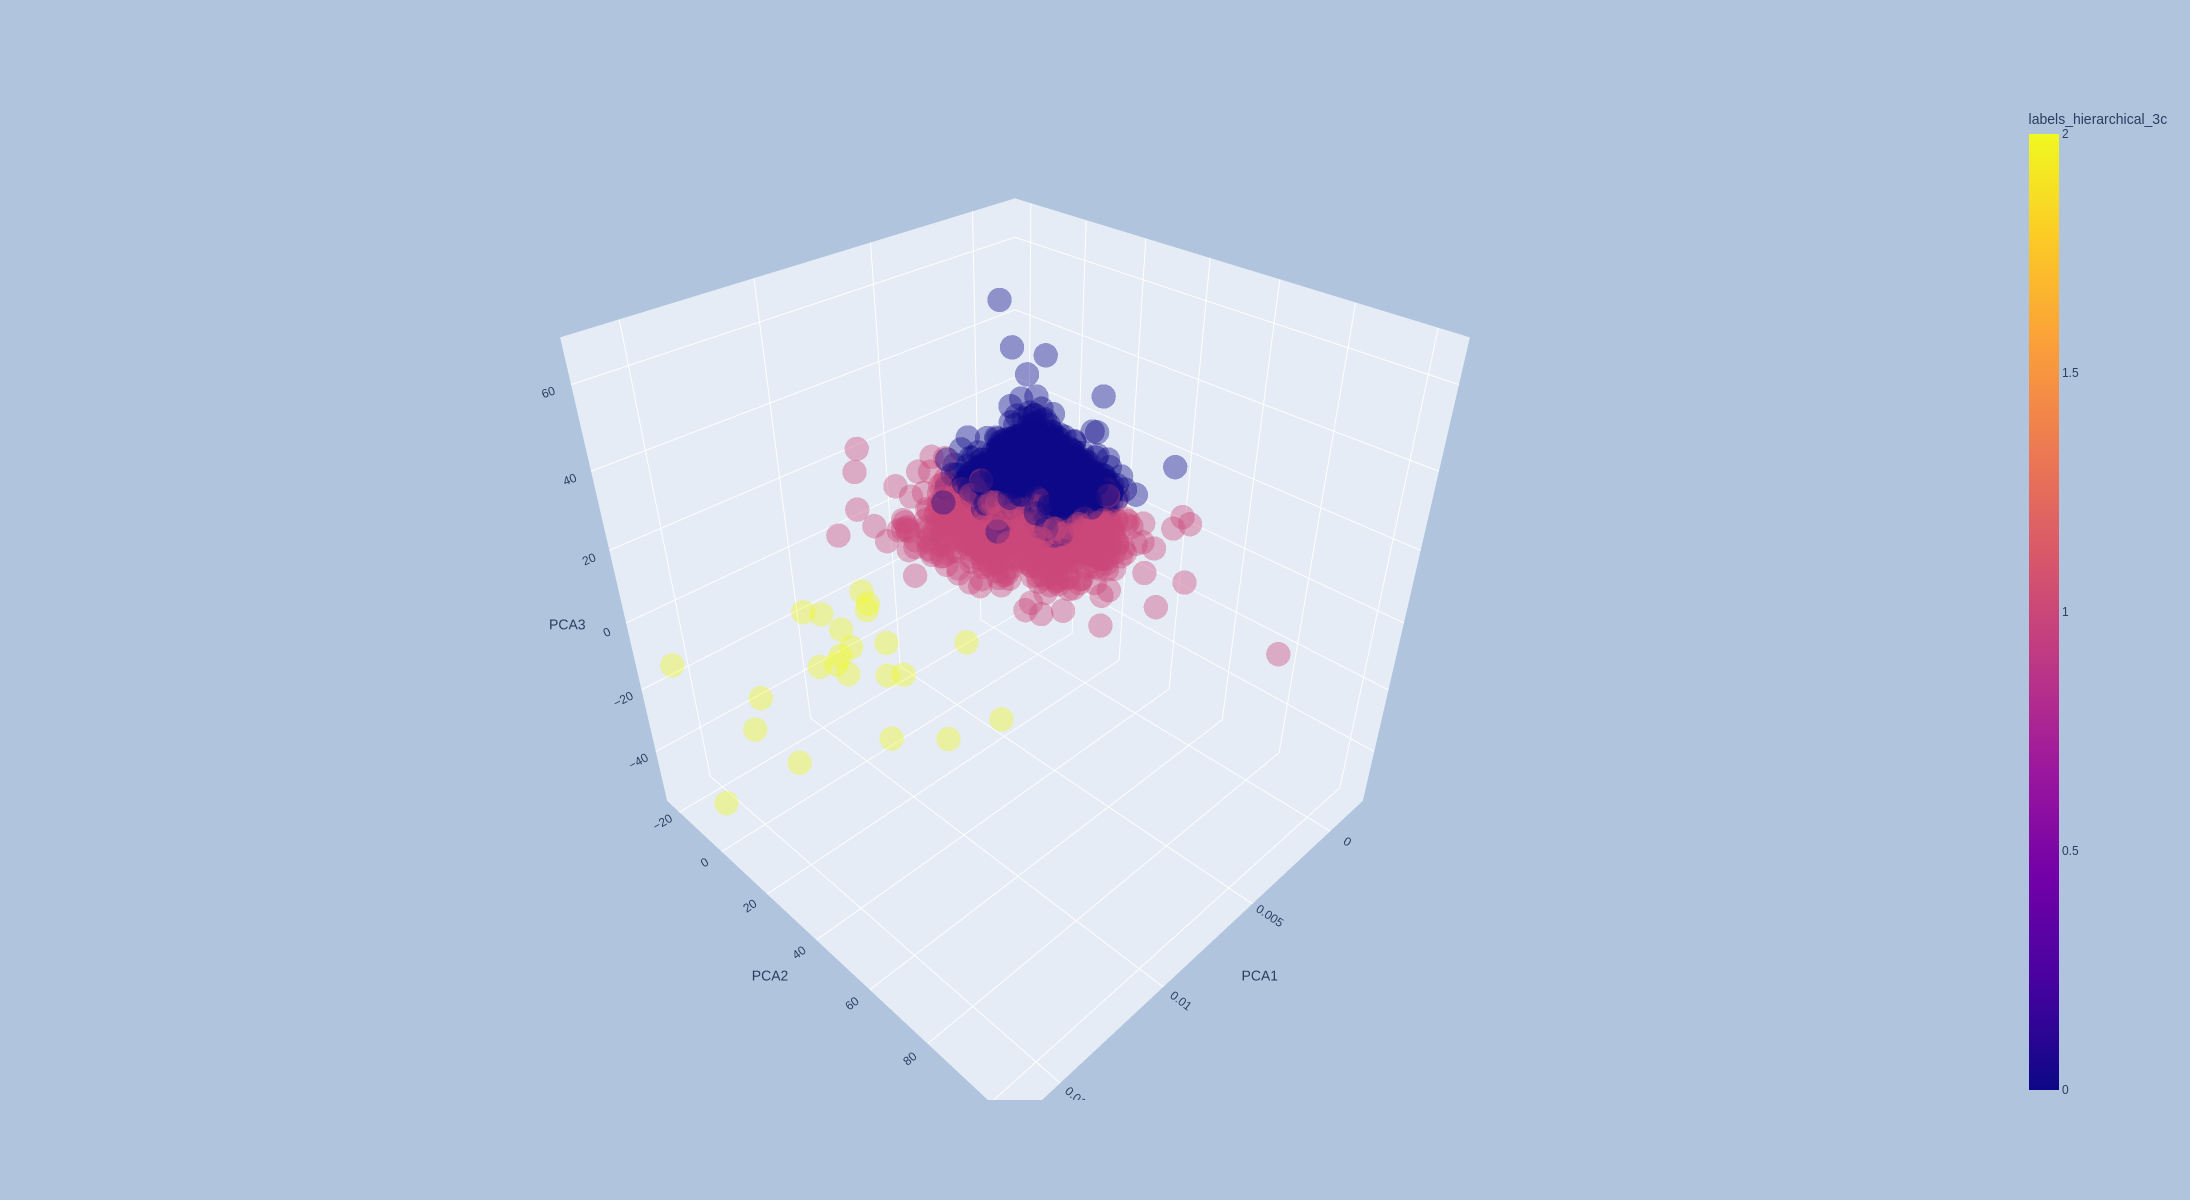

In [127]:
fig = px.scatter_3d(data, x='PCA1', y='PCA2', z='PCA3',
                    size_max=18, color='labels_hierarchical_3c',
              #symbol='labels_hierarchical_3c', 
                    opacity=0.4)
fig.update_layout(
    autosize=False,
    width=1200,
    height=1200,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [268]:
data['Outlier_Tier'].value_counts()

0    8152
1     186
2     162
Name: Outlier_Tier, dtype: int64

In [40]:
data['KMeans_label'].value_counts()

2    5820
1    1521
0    1159
Name: KMeans_label, dtype: int64

In [41]:
data['PowTrUMAT'].value_counts()

7    1498
1    1498
4    1234
5    1150
6     965
2     853
0     836
3     466
Name: PowTrUMAT, dtype: int64

In [106]:
# PCA Components
x= [1.06194383e+00, 1.00000000e+00, 4.46677475e-01, 5.62091843e-01,
    7.24014038e-04, 4.38272428e-01, 5.10105399e-04, 2.21981065e-04,
    3.89349569e-04, 7.09924606e-05, 1.51932414e-03, 1.59787982e-02,
    3.69759969e+00, 9.41023601e-03, 1.26586422e+00, 5.06410500e-01,
    1.59209788e-04]
y= [1.00000000e+00, 4.29317799e-01, 6.39760390e-01, 2.57158094e-01,
    4.13951803e-04, 1.72289614e-01, 2.10204308e-04, 1.00947687e-04,
    1.50849664e-04, 8.82644669e-05, 2.20207573e-03, 6.60654032e-03,
    2.33831133e+00, 5.17991937e-03, 8.30543423e-01, 4.27500408e-01,
    4.79691303e-05]
z= [8.01213495e+03, 6.19222755e+03, 4.81110988e+03, 5.19922455e+03,
    5.12962043e+00, 9.93366022e+02, 2.32845476e+00, 1.89132722e+00,
    1.00000000e+00, 7.11103525e-01, 1.48563226e+01, 7.11426195e+01,
    3.01509827e+04, 7.24671235e+01, 1.01522166e+04, 2.63670141e+03,
    9.74989730e-01]

c = data.iloc[:,0:17]
c
#np.multiply(np.array(x),c)
data.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc', 'Outlier_CBLOF', 'Outlier_IF', 'KMeans_label',
       'labels_hierarchical_3c', 'labels_hierarchical_9c', 'PowTrUMAT'],
      dtype='object')

In [ ]:
x: [1.08897480e+00 1.00000000e+00 6.27412059e-01 6.23195648e-01
 5.09526901e-04 3.77001325e-01 3.28712380e-04 1.58126747e-04
 2.48492317e-04 7.69744168e-05 1.97157706e-03 1.29580958e-02
 3.07744370e+00 6.53342617e-03 1.42281164e+00 5.82871665e-01
 9.96081316e-05 7.43034776e-04 1.59864419e-04 2.10136644e-03]
y: [1.03779383e+04 3.64451801e+03 8.27848792e+03 2.30467583e+03
 4.04632234e+00 1.34077401e+03 1.70282628e+00 7.75089690e-01
 1.18357309e+00 1.00000000e+00 2.70336268e+01 5.06148341e+01
 2.31913492e+04 5.18769094e+01 9.74370677e+03 5.29987459e+03
 4.08338030e-01 6.62509756e+00 1.09490300e+00 1.45431913e+01]
z: [1.85925312e+03 8.76585210e+02 1.10578241e+03 2.94869971e+02
 1.00000000e+00 5.82113586e+02 6.30146174e-01 1.86607177e-01
 5.34949381e-01 1.78914133e-01 4.66935195e+00 1.93012186e+01
 3.41481630e+03 1.17987456e+01 1.35745505e+03 1.51172439e+03
 1.15808174e-01 1.55459002e+00 7.61303838e-02 2.32095269e+00]

In [43]:
Marco = ['balance_account', 'purchases_amount', 'paid_advance', 'installments', 'payments']
Jonas = ['balance_account', 'purchases_amount', 'purchases_installments_frequency']
Michael = ['fixed_rate_period', 'payments', 'purchases_amount', 'purchases_installments_frequency', 'balance_account']

In [272]:
median_balance = data['balance_account'].median()
median_pfreq = data['purchases_frequency'].median()
median_creditlimit = data['credit_limit'].median()
median_nr_p = data['nr_purchases'].median()
total_balance
data.median()

balance_account                      869.046468
purchases_amount                     360.000000
paid_advance                           0.000000
full_purchases                        37.400000
balance_frequency_update               1.000000
installments                          89.000000
purchases_frequency                    0.500000
full_purchases_frequency               0.083333
purchases_installments_frequency       0.166667
cash_advance_frequency                 0.000000
nr_cash_advances                       0.000000
nr_purchases                           7.000000
credit_limit                        3000.000000
fixed_rate_period                     12.000000
payments                             851.146952
min_payments                         299.767562
full_payment_prc                       0.000000
Outlier_CBLOF                          0.000000
Outlier_IF                             0.000000
KMeans_label                           2.000000
labels_hierarchical_3c                 0

In [269]:
Outliers_agg_ratio = data.groupby('Outlier_Tier').agg({'balance_frequency_update': 'count',
                                                 'purchases_amount': ['sum', 'mean', 'median'],
                                                 'installments': ['sum', 'mean', 'median']}).reset_index()
Outliers_agg_ratio

Outlier_Tier balance_frequency_update purchases_amount               \
                                  count              sum         mean   
0            0                     8152       6396866.32   784.699009   
1            1                      186        479750.74  2579.305054   
2            2                      162       1619654.09  9997.864753   

            installments                         
     median          sum         mean    median  
0   341.465   2809362.12   344.622439    80.000  
1  1321.140    175202.36   941.948172   325.980  
2  8753.040    514957.70  3178.751235  1660.035

In [270]:
Outliers_agg = data.groupby('Outlier_Tier').agg({'balance_frequency_update': 'count',
                                                 'balance_account': ['sum', 'mean', 'median'], 
                                                 'purchases_amount': ['sum', 'mean', 'median'],
                                                 'purchases_frequency': ['mean', 'median'],
                                                 'installments': ['sum', 'mean', 'median'], 
                                                 'payments': ['sum', 'mean', 'median'],
                                                 'credit_limit':['sum', 'mean', 'median'],
                                                 'nr_purchases': ['sum', 'mean', 'median'],
                                                 'fixed_rate_period': ['mean', 'median'],
                                                 'purchases_installments_frequency': ['mean', 'median']}).reset_index()
Outliers_agg

Outlier_Tier balance_frequency_update balance_account               \
                                  count             sum         mean   
0            0                     8152    1.166911e+07  1431.440916   
1            1                      186    7.911841e+05  4253.677841   
2            2                      162    8.502115e+05  5248.219132   

               purchases_amount                        purchases_frequency  \
        median              sum         mean    median                mean   
0   811.601783       6396866.32   784.699009   341.465            0.480495   
1  3557.341064        479750.74  2579.305054  1321.140            0.607990   
2  3989.037780       1619654.09  9997.864753  8753.040            0.800448   

             ...  credit_limit                        nr_purchases             \
     median  ...           sum          mean   median          sum       mean   
0  0.454545  ...  3.464866e+07   4250.326071   3000.0     103504.0  12.696762   
1  0.833333  ...  1.537200e+06   8264.516129   7600.0       7502.0  40.333333   
2  1.000000  ...  1.941450e+06  11984.259259  11500.0      13749.0  84.870370   

         fixed_rate_period        purchases_installments_frequency            
  median              mean median                             mean    median  
0    7.0         11.510918   12.0                         0.355414  0.166667  
1   19.0         11.505376   12.0                         0.485655  0.583333  
2   71.0         11.790123   12.0                         0.645700  0.833333  

[3 rows x 26 columns]

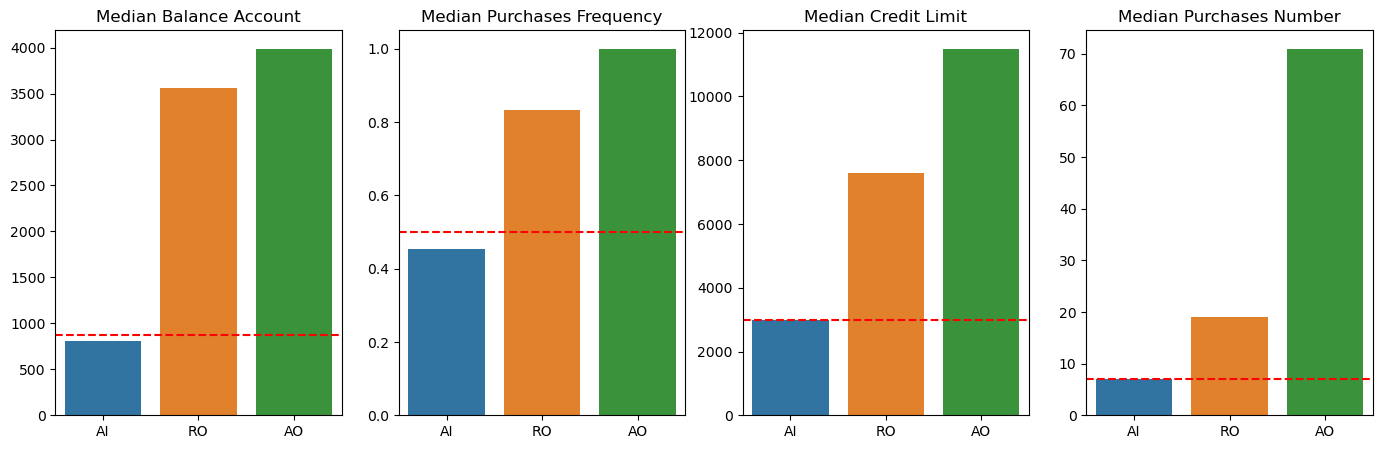

In [273]:
fig2, axs2 = plt.subplots(1,4, figsize=(17,5))

sns.barplot(data=Outliers_agg, x='Outlier_Tier', y=Outliers_agg['balance_account']['median'], ax=axs2[0])
axs2[0].axhline(y=median_balance, ls='--', c='r')
axs2[0].set(title='Median Balance Account', xlabel=None, ylabel=None, xticklabels=['AI', 'RO', 'AO'])
sns.barplot(data=Outliers_agg, x='Outlier_Tier', y=Outliers_agg['purchases_frequency']['median'], ax=axs2[1])
axs2[1].axhline(y=median_pfreq, ls='--', c='r')
axs2[1].set(title='Median Purchases Frequency', xlabel=None, ylabel=None, xticklabels=['AI', 'RO', 'AO'])
sns.barplot(data=Outliers_agg, x='Outlier_Tier', y=Outliers_agg['credit_limit']['median'],ax=axs2[2])
axs2[2].axhline(y=median_creditlimit, ls='--', c='r')
axs2[2].set(title='Median Credit Limit', xlabel=None, ylabel=None, xticklabels=['AI', 'RO', 'AO'])
sns.barplot(data=Outliers_agg, x='Outlier_Tier', y=Outliers_agg['nr_purchases']['median'], ax=axs2[3])
axs2[3].axhline(y=median_nr_p, ls='--', c='r')
axs2[3].set(title='Median Purchases Number', xlabel=None, ylabel=None, xticklabels=['AI', 'RO', 'AO'])


plt.savefig('../figures/Outliers_Bar_Charts', bbox_inches='tight')    
plt.show()

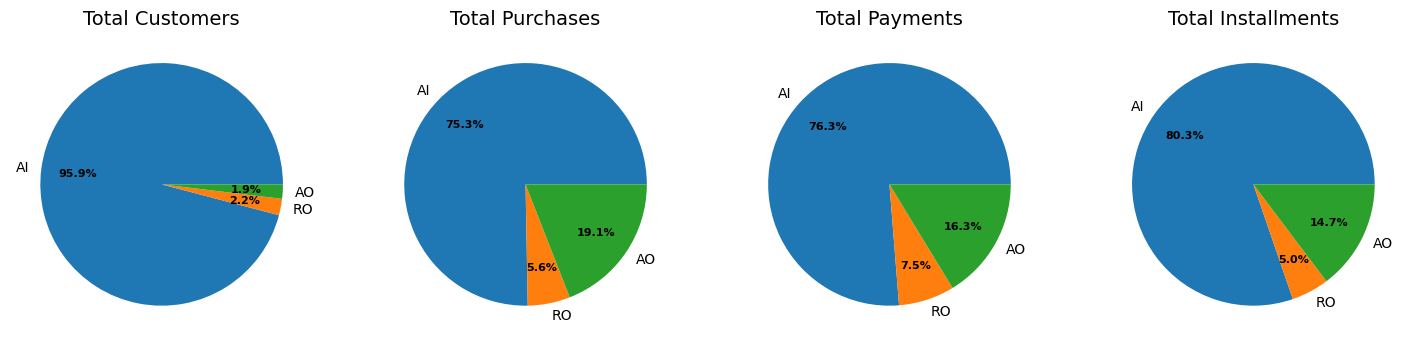

In [250]:
fig1, axs1 = plt.subplots(1,4, figsize=(18,18))

features = [Outliers_agg['balance_frequency_update']['count'],
            Outliers_agg['purchases_amount']['sum'],
            Outliers_agg['payments']['sum'],
            Outliers_agg['installments']['sum']
           ]
titles = ['Total Customers',
          'Total Purchases',
          'Total Payments',
          'Total Installments'
         ]          

for i, feature in enumerate(features):
    wedges, texts, autotexts = axs1[i].pie(feature, labels=['AI', 'RO', 'AO'], autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1)
    axs1[i].set_title(titles[i], size=14)
    plt.setp(autotexts, size=8, weight="bold")

plt.savefig('../figures/Outliers_pie_charts', bbox_inches='tight')    
plt.show()

<BarContainer object of 3 artists>

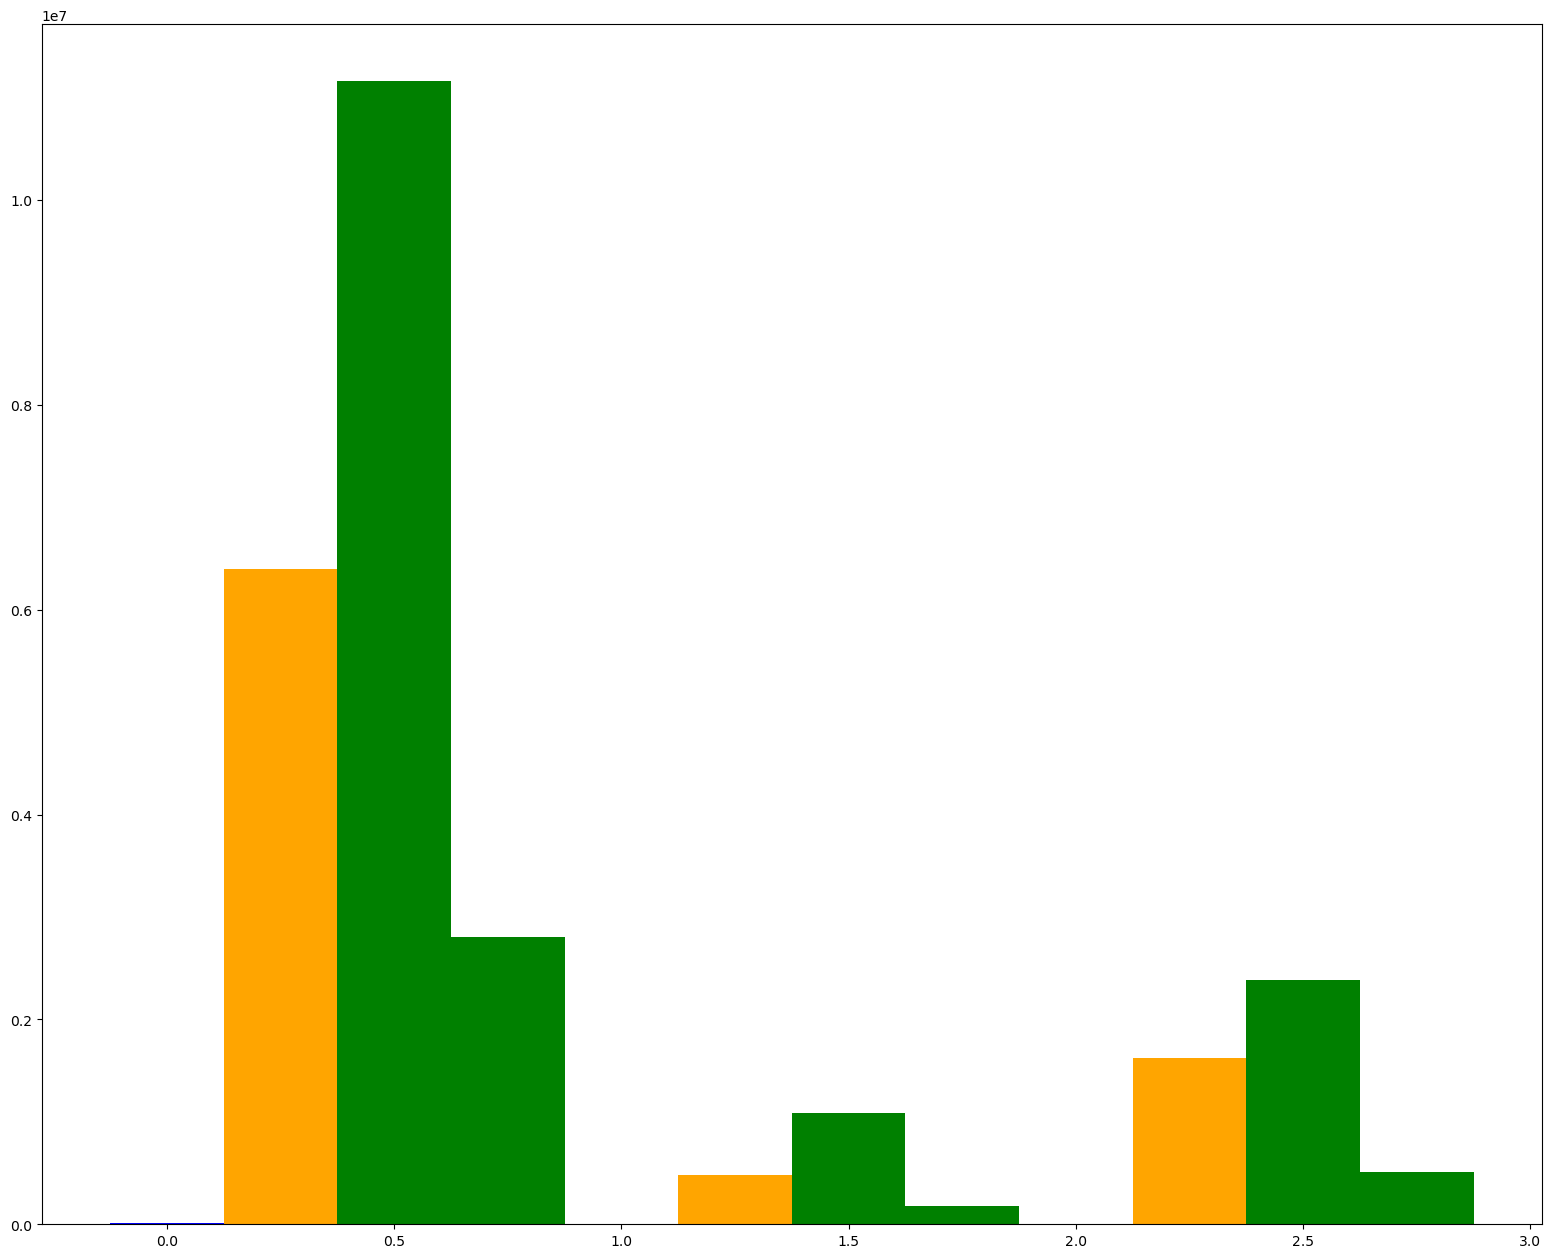

In [211]:
data_plot = [Outliers_agg['balance_frequency_update']['count'],
             Outliers_agg['purchases_amount']['sum'],
             Outliers_agg['payments']['sum'],
             Outliers_agg['installments']['sum']
           ]
titles = ['Total Customers',
          'Total Purchases',
          'Total Payments',
          'Total Installments'
         ] 
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data_plot[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data_plot[1], color = 'orange', width = 0.25)
ax.bar(X + 0.50, data_plot[2], color = 'g', width = 0.25)
ax.bar(X + 0.75, data_plot[3], color = 'g', width = 0.25)

In [ ]:
for i, feature in enumerate(features):
    wedges, texts, autotexts = axs[i].pie(feature, labels=Outliers_agg['Outlier_Tier'], autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1)
    axs[i].set_title(titles[i], size=14)
    plt.setp(autotexts, size=8, weight="bold")

plt.savefig('../figures/Outliers_bar_charts', bbox_inches='tight')    
plt.show()

In [189]:
    wedges, texts, autotexts = axs[1].pie(feature, labels=Outliers_agg['Outlier_Tier'], autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, explode=(0.1, 0, 0))#, explode=(0.1, 0, 0.1))#, autopct='%1.1f%%', #shadow=True, startangle=90)
    axs[1].set_title("Total Purchases")

    wedges, texts, autotexts = axs[2].pie(feature, labels=Outliers_agg['Outlier_Tier'], autopct='%1.1f%%')#, autopct='%1.1f%%', #shadow=True, startangle=90)
#axs.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.setp(autotexts, size=8, weight="bold")
plt.show()

In [164]:
data.groupby('Outlier_CBLOF').agg({'balance_frequency_update': 'count',
                                  'balance_account': ['sum', 'mean'], 
                                  'purchases_amount': ['sum', 'mean'],
                                  'installments': ['sum', 'mean'], 
                                  'payments': ['sum', 'mean'],
                                  'fixed_rate_period': ['mean'],
                                  'purchases_installments_frequency': ['mean']})

balance_frequency_update balance_account               \
                                 count             sum         mean   
Outlier_CBLOF                                                         
0                                 8245    1.213865e+07  1472.244200   
1                                  255    1.171848e+06  4595.484304   

              purchases_amount              installments               \
                           sum         mean          sum         mean   
Outlier_CBLOF                                                           
0                   6732010.83   816.496159   2928110.63   355.137736   
1                   1764260.32  6918.667922    571411.55  2240.829608   

                   payments               fixed_rate_period  \
                        sum          mean              mean   
Outlier_CBLOF                                                 
0              1.165595e+07   1413.699745         11.506489   
1              2.974679e+06  11665.407889         11.827451   

              purchases_installments_frequency  
                                          mean  
Outlier_CBLOF                                   
0                                     0.358827  
1                                     0.524470

In [128]:
data.groupby('Outlier_IF').agg({'balance_frequency_update': 'count',
                                  'balance_account': ['sum', 'mean'], 
                                  'purchases_amount': ['sum', 'mean'],
                                  'installments': ['sum', 'mean'], 
                                  'payments': ['sum', 'mean'],
                                  'fixed_rate_period': ['mean'],
                                  'purchases_installments_frequency': ['mean']})

balance_frequency_update balance_account               \
                              count             sum         mean   
Outlier_IF                                                         
0                              8245    1.199074e+07  1454.304833   
1                               255    1.319759e+06  5175.523842   

           purchases_amount              installments               \
                        sum         mean          sum         mean   
Outlier_IF                                                           
0                6541472.55   793.386604   2865815.97   347.582289   
1                1954798.60  7665.876863    633706.21  2485.122392   

                payments               fixed_rate_period  \
                     sum          mean              mean   
Outlier_IF                                                 
0           1.174835e+07   1424.905829         11.515221   
1           2.882285e+06  11303.077840         11.545098   

           purchases_installments_frequency  
                                       mean  
Outlier_IF                                   
0                                  0.354938  
1                                  0.650192

In [ ]:
data.groupby('labels_hierarchical_3c').agg({'balance_frequency_update': 'count',
                                  'balance_account': ['sum', 'mean'], 
                                  'purchases_amount': ['sum', 'mean'],
                                  'installments': ['sum', 'mean'], 
                                  'payments': ['sum', 'mean'],
                                  'fixed_rate_period': ['mean'],
                                  'purchases_installments_frequency': ['mean']})

In [83]:
data.groupby('KMeans_label').agg({'balance_frequency_update': 'count',
                                  'balance_account': ['sum', 'mean'], 
                                  'purchases_amount': ['sum', 'mean'],
                                  'installments': ['sum', 'mean'], 
                                  'payments': ['sum', 'mean'],
                                  'fixed_rate_period': ['mean'],
                                  'purchases_installments_frequency': ['mean']})

balance_frequency_update balance_account               \
                                count             sum         mean   
KMeans_label                                                         
0                                1159    2.620735e+06  2261.203752   
1                                1521    6.061340e+06  3985.102221   
2                                5820    4.628426e+06   795.262251   

             purchases_amount              installments               \
                          sum         mean          sum         mean   
KMeans_label                                                           
0                  4976912.83  4294.143943   1823926.36  1573.706954   
1                   572181.75   376.187870    203464.07   133.769934   
2                  2947176.57   506.387727   1472131.75   252.943600   

                  payments              fixed_rate_period  \
                       sum         mean              mean   
KMeans_label                                                
0             4.831096e+06  4168.331457         11.921484   
1             4.513345e+06  2967.354030         11.349112   
2             5.286192e+06   908.280373         11.479038   

             purchases_installments_frequency  
                                         mean  
KMeans_label                                   
0                                    0.747465  
1                                    0.143565  
2                                    0.344947

In [72]:
data.groupby('labels_hierarchical_3c').agg({'balance_frequency_update': 'count',
                                  'balance_account': ['sum', 'mean'], 
                                  'purchases_amount': ['sum', 'mean'],
                                  'installments': ['sum', 'mean'], 
                                  'payments': ['sum', 'mean'],
                                  'fixed_rate_period': ['mean'],
                                  'purchases_installments_frequency': ['mean']})

balance_frequency_update balance_account               \
                                          count             sum         mean   
labels_hierarchical_3c                                                         
0                                          7001    7.702692e+06  1100.227334   
1                                          1476    5.497126e+06  3724.339810   
2                                            23    1.106848e+05  4812.382778   

                       purchases_amount               installments  \
                                    sum          mean          sum   
labels_hierarchical_3c                                               
0                            4528486.01    646.834168   2244511.42   
1                            3335162.33   2259.595075   1137989.35   
2                             632622.81  27505.339565    117021.41   

                                         payments                \
                               mean           sum          mean   
labels_hierarchical_3c                                            
0                        320.598689  8.440510e+06   1205.614883   
1                        770.995495  5.542927e+06   3755.370567   
2                       5087.887391  6.471967e+05  28138.984873   

                       fixed_rate_period             \
                                     sum       mean   
labels_hierarchical_3c                                
0                                80300.0  11.469790   
1                                17313.0  11.729675   
2                                  274.0  11.913043   

                       purchases_installments_frequency            
                                                    sum      mean  
labels_hierarchical_3c                                             
0                                           2472.630809  0.353183  
1                                            603.336028  0.408764  
2                                             16.299999  0.708696

In [103]:
UMAP_agg = data.groupby('PowTrUMAT').agg({'balance_frequency_update': 'count',
                                  'balance_account': ['sum', 'mean'], 
                                  'purchases_amount': ['sum', 'mean'],
                                  'installments': ['sum', 'mean'], 
                                  'payments': ['sum', 'mean'],
                                  'fixed_rate_period': ['mean'],
                                  'purchases_installments_frequency': ['mean']}).reset_index()
UMAP_agg['PowTrUMAT']

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
Name: PowTrUMAT, dtype: int64

ValueError: 'label' must be of length 'x'

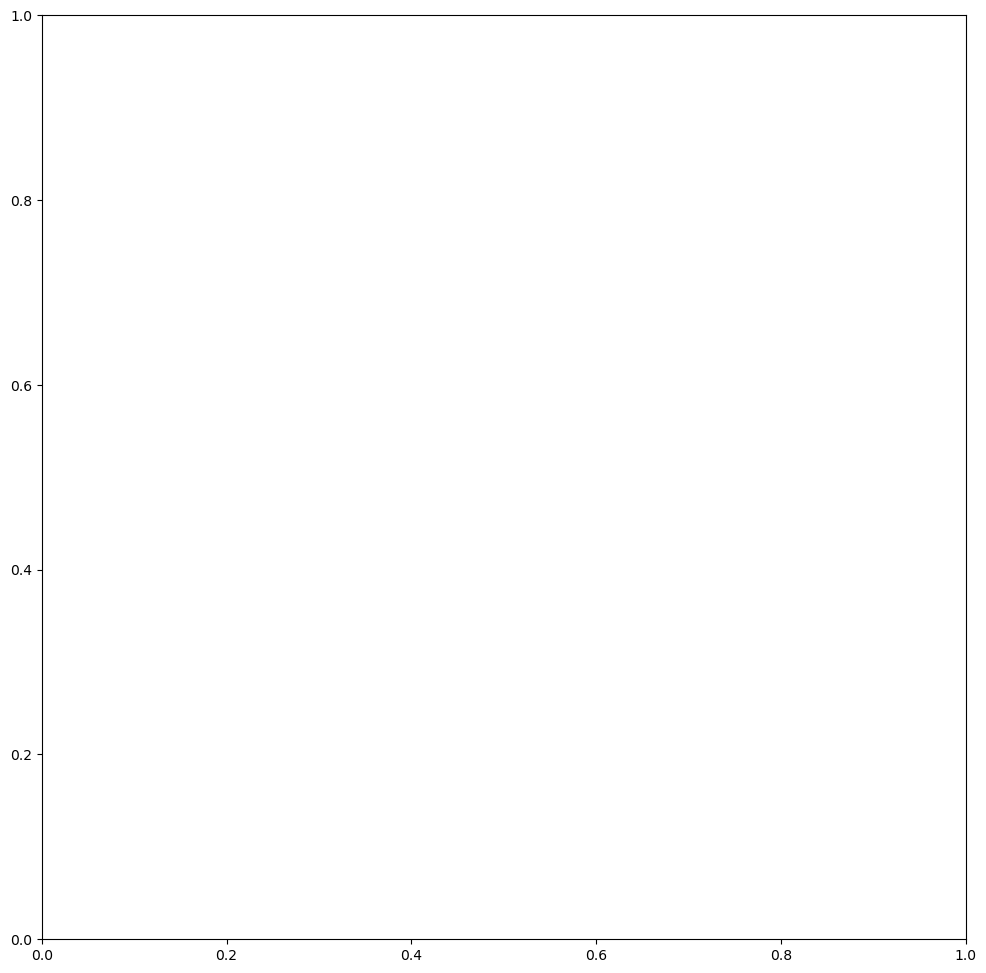

In [105]:
explode = UMAP_agg.index[1]

fig1, ax1 = plt.subplots()
ax1.pie(UMAP_agg.iloc[0], labels=UMAP_agg['PowTrUMAT'])#, autopct='%1.1f%%',
        #shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [46]:
inliers = data[(data['Outlier_CBLOF']==0) & (data['Outlier_IF']==0) ]
outliers_CBLOF = data[data['Outlier_CBLOF']==1]
outliers_IF = data[data['Outlier_IF']==1]

In [ ]:
plt.figures(figsize=(20,20))
plt.scatter(x=

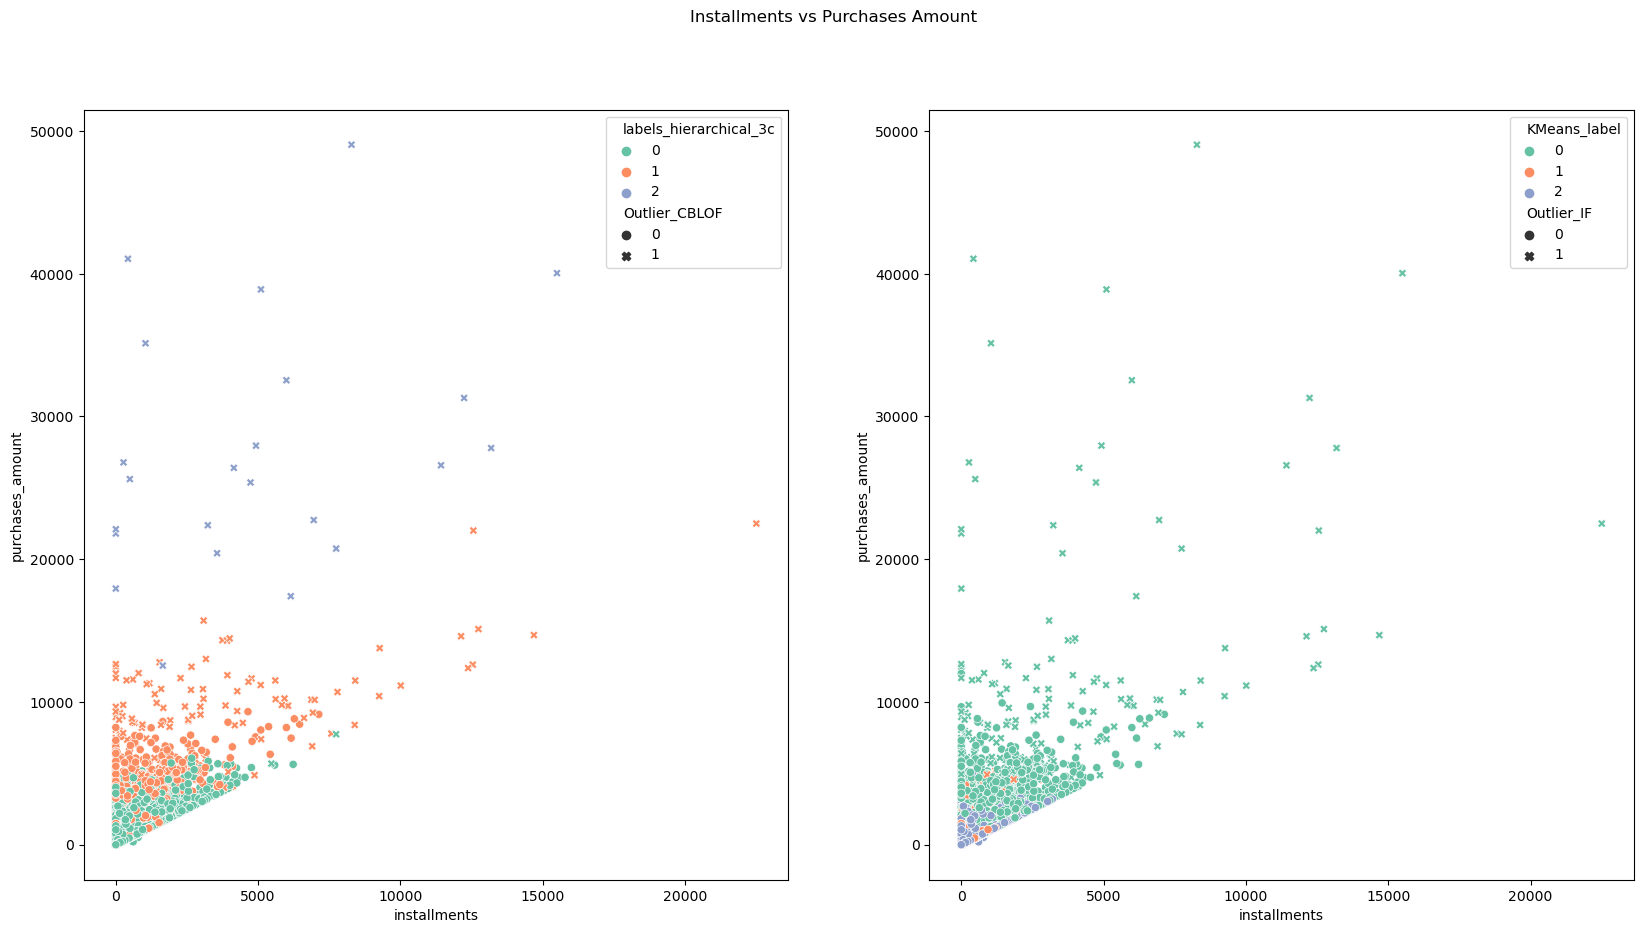

In [20]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(data=data, x='installments', y='purchases_amount', hue='labels_hierarchical_3c', palette='Set2', style='Outlier_CBLOF', ax=axs[0]);
sns.scatterplot(data=data, x='installments', y='purchases_amount', hue='KMeans_label', palette='Set2', style='Outlier_IF', ax=axs[1]);
plt.suptitle('Installments vs Purchases Amount');

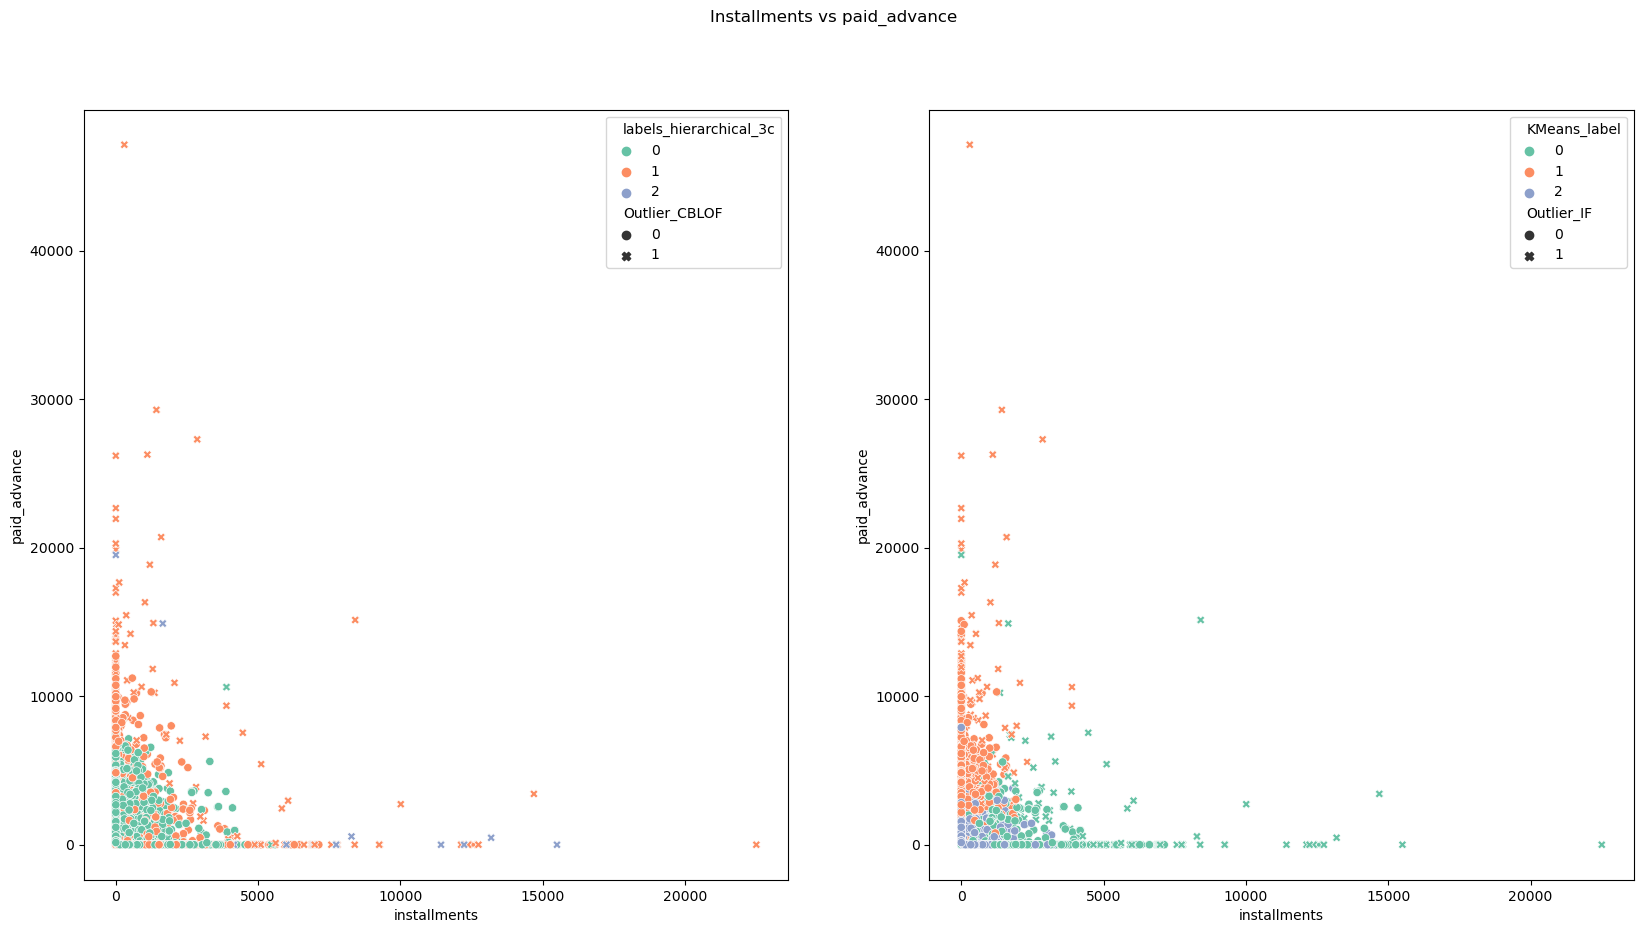

In [47]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(data=data, x='installments', y='paid_advance', hue='labels_hierarchical_3c', palette='Set2', style='Outlier_CBLOF', ax=axs[0]);
sns.scatterplot(data=data, x='installments', y='paid_advance', hue='KMeans_label', palette='Set2', style='Outlier_IF', ax=axs[1]);
plt.suptitle('Installments vs paid_advance');

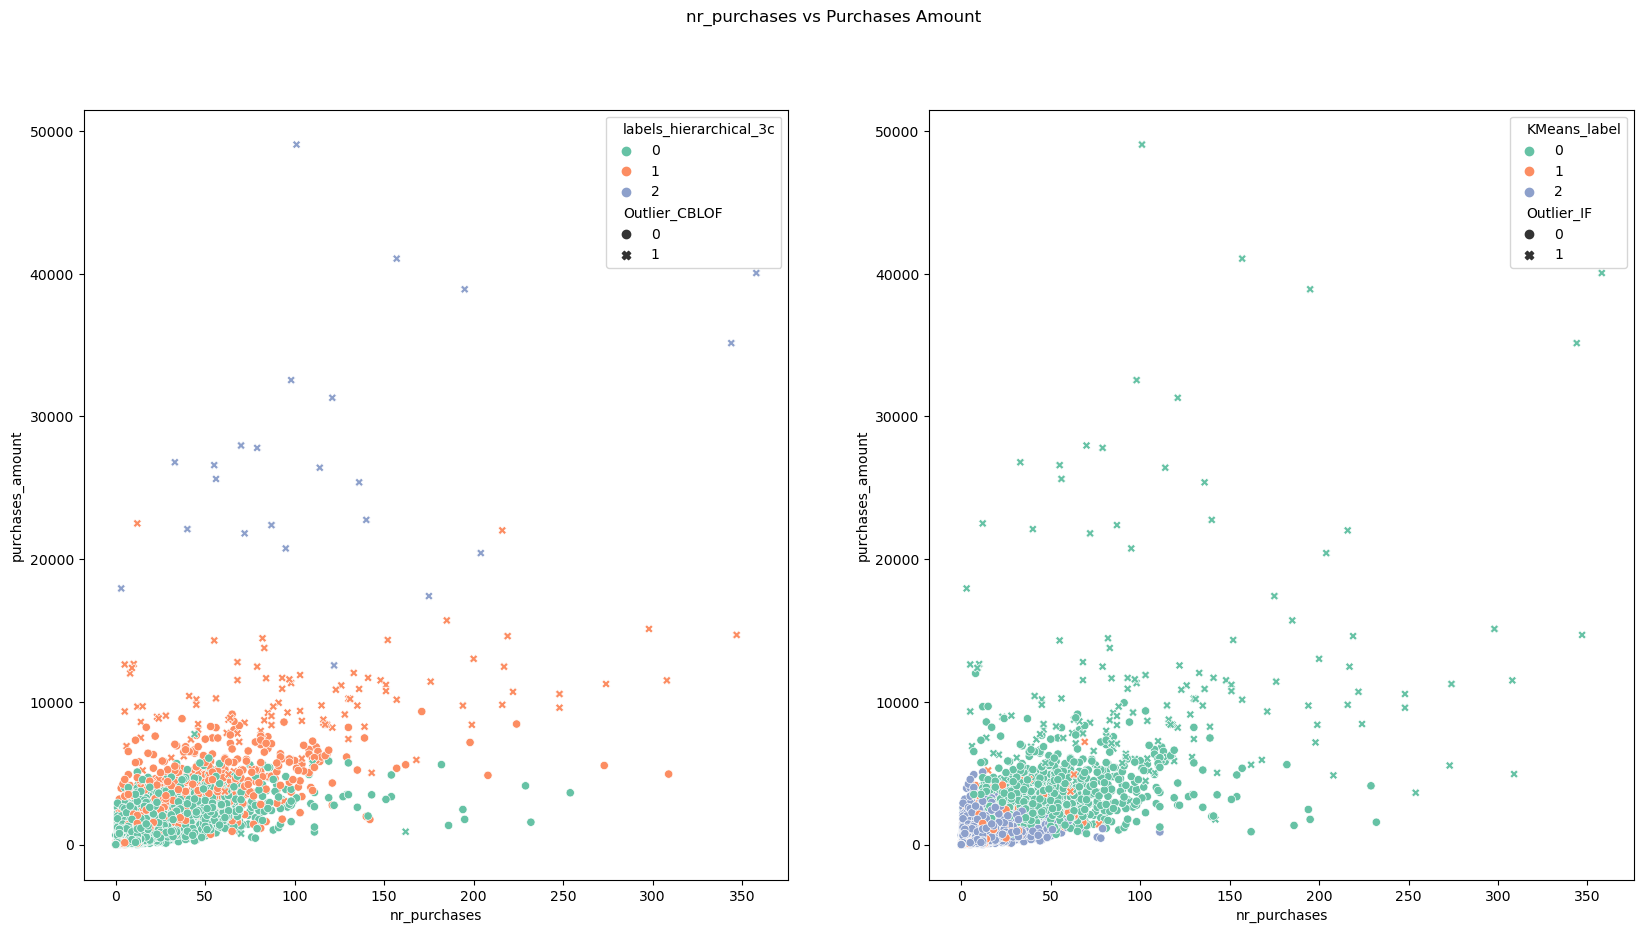

In [52]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(data=data, x='nr_purchases', y='purchases_amount', hue='labels_hierarchical_3c', palette='Set2', style='Outlier_CBLOF', ax=axs[0]);
sns.scatterplot(data=data, x='nr_purchases', y='purchases_amount', hue='KMeans_label', palette='Set2', style='Outlier_IF', ax=axs[1]);
plt.suptitle('nr_purchases vs Purchases Amount');

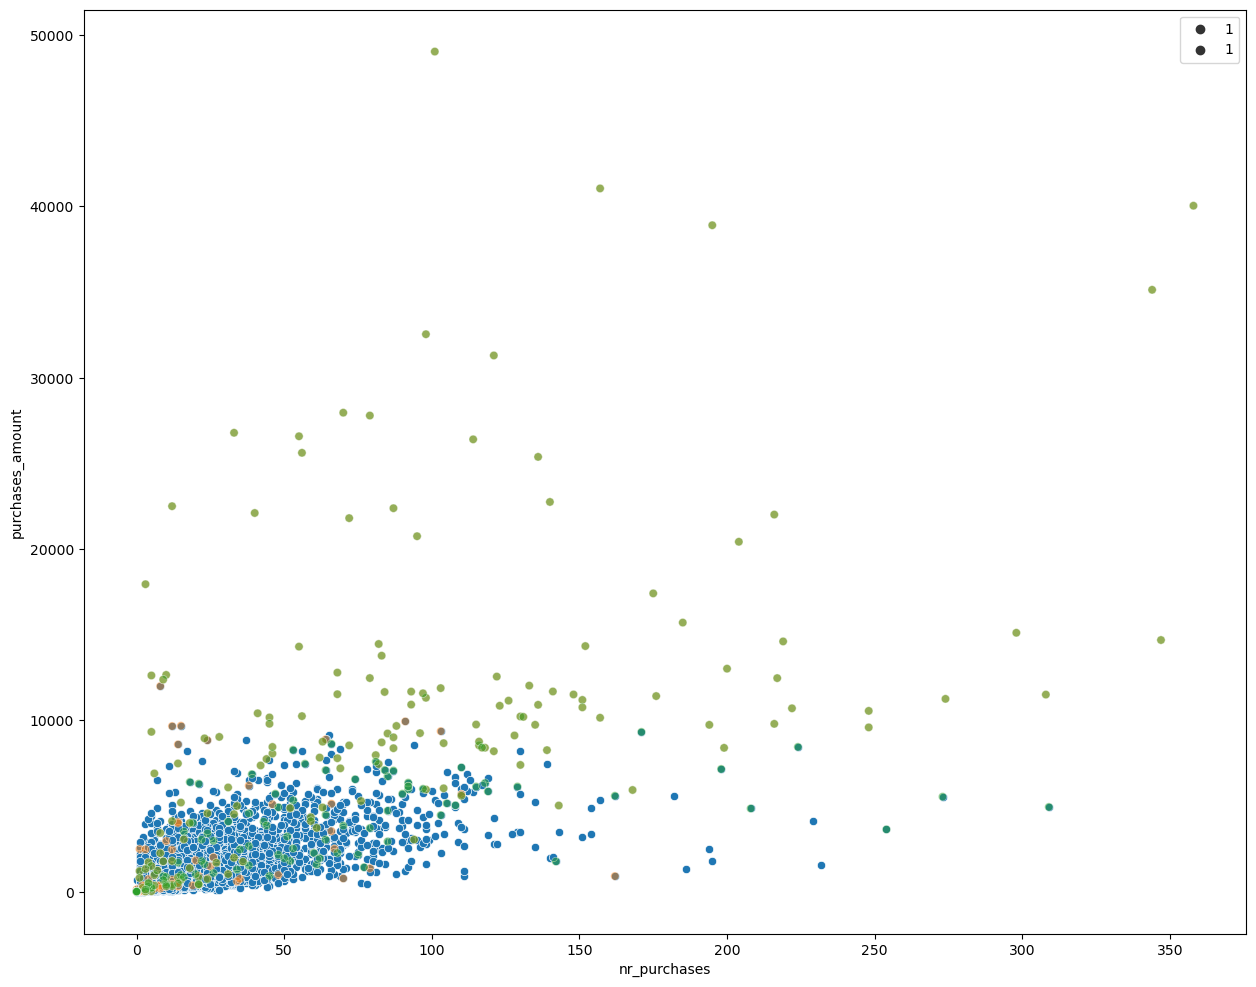

In [62]:
plt.figure();
sns.scatterplot(data=data[(data['Outlier_CBLOF']==0) | (data['Outlier_IF']==0)], x='nr_purchases', y='purchases_amount', palette = 'viridis');#, hue='labels_hierarchical_3c', palette='Set2', style='Outlier_CBLOF'
sns.scatterplot(data=data[data['Outlier_CBLOF']==1], x='nr_purchases', y='purchases_amount', alpha = 0.5, palette = 'Set2',style='Outlier_CBLOF');
sns.scatterplot(data=data[data['Outlier_IF']==1], x='nr_purchases', y='purchases_amount', alpha = 0.5, palette = 'Set2', style='Outlier_IF');
plt.legend();

## END OF NOTEBOOK